In [3]:
# Importing all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset in a dataframe using python
df=pd.read_csv("US_Covid_19_data.csv",parse_dates=["Last_Update"])

df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [5]:
# shape of the data
df.shape

(58, 18)

In [6]:
# columns in the data
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [7]:
# data types
df.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [8]:
#Printing all of the data types and their unique values

for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : '+ str(df[column].unique()))
        print(df[column].value_counts())
        print("*******************************************************************")

Province_State : ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
Maine                       1
Mississippi                 1
Illinois                    1
Alabama                     1
Texas                       1
Wisconsin                   1
Puerto Rico                 1
Ohio                        1
New York          

In [9]:
# as all data is of same date we can drop Last_Update column here
df["Last_Update"].unique()

array(['2020-05-21T02:32:54.000000000'], dtype='datetime64[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

Now, the summary shows that the variables Recovered,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,
Testing_Rate,Hospitalization_Rate are having missing values and are numerical data types .So, I will impute the missing values 
with the mean value.

In [11]:
# as most values of ISO3  are USA so we can drop this column as well in Data Preparation for Model Building
df["ISO3"].value_counts()

USA    53
ASM     1
PRI     1
GUM     1
VIR     1
MNP     1
Name: ISO3, dtype: int64

# Summary Statistics

In [12]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


# to check correlation

In [13]:
dfcor=df.corr()

dfcor

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120959,0.120024,0.043318,0.120148,-0.374943,0.245693,0.084769,0.065030,-0.189675,0.774106,0.309579,-0.162856
Long_,-0.278274,1.000000,0.009998,0.028772,-0.043379,0.011654,0.367911,0.041318,-0.077781,0.280909,0.318569,-0.526908,0.190191,0.251661
Confirmed,0.120959,0.009998,1.000000,0.982191,0.876856,0.985218,-0.096696,0.711776,0.828022,0.989936,0.383425,0.153972,0.334032,0.327376
Deaths,0.120024,0.028772,0.982191,1.000000,0.856295,0.954378,-0.075053,0.712117,0.741730,0.992313,0.427721,0.120043,0.345441,0.325817
Recovered,0.043318,-0.043379,0.876856,0.856295,1.000000,0.809437,-0.013571,0.592014,0.950785,0.962082,0.362330,0.166898,0.252155,0.302197
Active,0.120148,0.011654,0.985218,0.954378,0.809437,1.000000,-0.092276,0.703931,0.829687,0.976456,0.368403,0.146354,0.322773,0.332398
FIPS,-0.374943,0.367911,-0.096696,-0.075053,-0.013571,-0.092276,1.000000,-0.220264,-0.194011,0.013433,-0.262258,0.058022,-0.092705,-0.172665
Incident_Rate,0.245693,0.041318,0.711776,0.712117,0.592014,0.703931,-0.220264,1.000000,0.441669,0.725370,0.373338,0.264768,0.620621,0.258029
People_Tested,0.084769,-0.077781,0.828022,0.741730,0.950785,0.829687,-0.194011,0.441669,1.000000,0.906210,0.231301,0.236043,0.230753,0.356618
People_Hospitalized,0.065030,0.280909,0.989936,0.992313,0.962082,0.976456,0.013433,0.725370,0.906210,1.000000,0.509658,0.013433,0.331753,0.377586


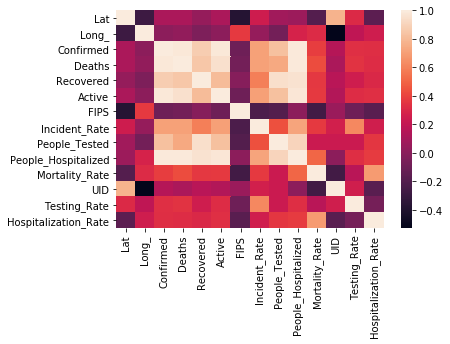

In [14]:
sns.heatmap(dfcor)

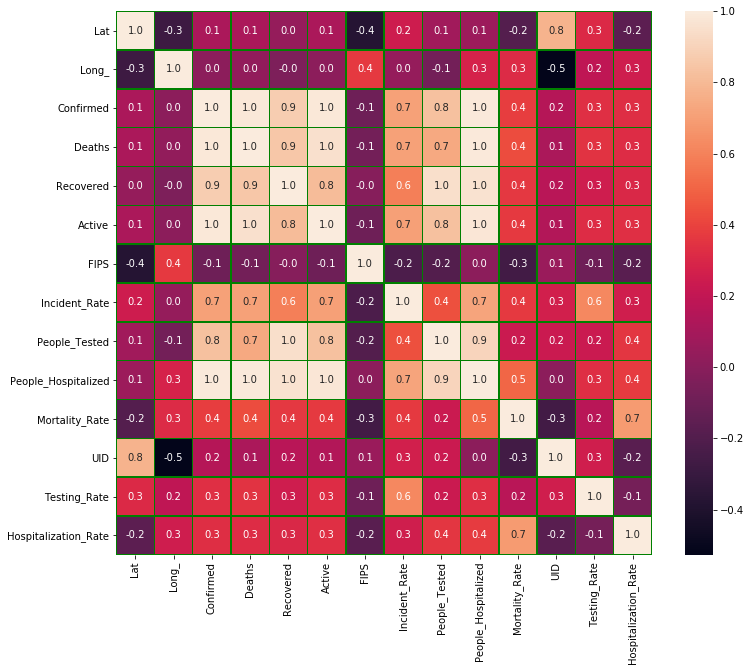

In [15]:
# Checking correlation using heatmap
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(dfcor,annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

above heatmap suggest that nos of deaths is directly correlated to no. of confirmed cases,recovered,active cases,people tested
,people hospitalized which is also a practical scenario.

In [16]:
df.columns 

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

 Dropping columns not relevant for training the model 

1. Dropping out Country_Region column whole data belongs to US only

2. Dropping out Last_Update column as whole data is of same date i.e.21-05-20

3. Dropping out Lat,Long_,FIPS,UID as they are irrelevant here predicting death rates

In [17]:
df.drop(columns=["Country_Region","Last_Update","Lat","Long_","FIPS","UID"],inplace=True)

In [18]:
df

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530.0,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,0,0,NaN,0.0,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,85997,3497,NaN,82500.0,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,Colorado,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,8194,310,3965.0,3919.0,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,Diamond Princess,49,0,NaN,49.0,NaN,NaN,NaN,0.000000,USA,NaN,NaN


# Univariate Analysis

In [19]:
df_new = df.drop("ISO3",axis=1)

In [20]:
# here we are setting province_state column as our index of our dataset for visualization
df_new.set_index("Province_State",inplace=True)

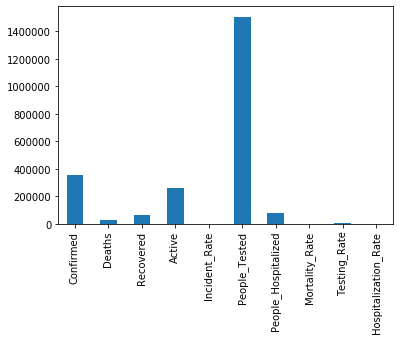

In [21]:
df_new.loc["New York",:].plot(kind="bar")

 above graph suggest that in New York above 14 lacs people were tested for corona virus test which is a very satisfactory value

In [22]:
# Here sorting the data according to decreasing order of their mortality rate
df_new.sort_values(["Mortality_Rate"],ascending=False,axis=0,inplace=True)

In [23]:
# Printing Top 10 worsly affected countries

df_top10 = df_new.head(10)

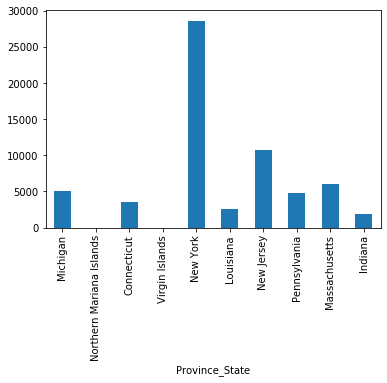

In [24]:
df_top10["Deaths"].plot(kind="bar")

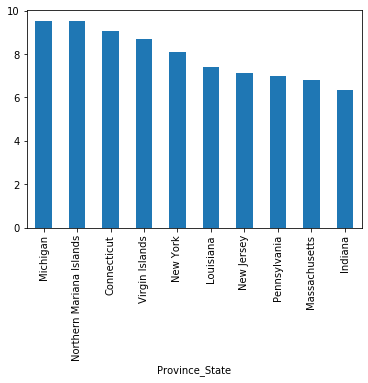

In [25]:
df_top10["Mortality_Rate"].plot(kind="bar")

 From above two graphs we can easily say that even though deaths are lower in other states when compared to New York City 
but  Mortality Rate Graph of top 4 worstly affected cities tends to be higher than that of New York City

In [26]:
# Here sorting the data according to decreasing order of their confirmed cases
df_new.sort_values(["Confirmed"],ascending=False,axis=0,inplace=True)

In [27]:
df_new

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,
New York,354370,28636,61886.0,263848.0,1821.620216,1505836.0,76410.0,8.080819,7740.670204,21.562209
New Jersey,150776,10749,23945.0,116082.0,1697.509285,531343.0,NaN,7.129119,5982.117023,NaN
Illinois,100418,4525,NaN,95893.0,792.451219,642713.0,NaN,4.506164,5071.986102,NaN
Massachusetts,88970,6066,NaN,82904.0,1290.822797,489953.0,8897.0,6.818029,7108.491647,10.000000
California,85997,3497,NaN,82500.0,217.646575,1380120.0,NaN,4.066421,3492.893832,NaN
Pennsylvania,68126,4770,NaN,63356.0,532.151684,349700.0,NaN,7.001732,2731.606784,NaN
Michigan,53009,5060,28234.0,19715.0,530.787614,437072.0,NaN,9.545549,4376.471997,NaN
Texas,51673,1426,30341.0,19906.0,178.208070,770241.0,NaN,2.759662,2656.380746,NaN
Florida,47471,2096,NaN,45375.0,221.024217,771348.0,8934.0,4.415327,3591.383953,18.819911


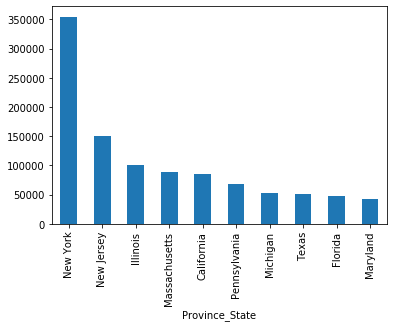

In [28]:
df_top10 = df_new.head(10)

df_top10["Confirmed"].plot(kind="bar")

 above graph suggest that in New York only around 350000 confirmed cases were there which itself is a very disturbing  no. 

Confirmed                  AxesSubplot(0.125,0.657941;0.110714x0.222059)
Deaths                  AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Recovered               AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Active                  AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Incident_Rate           AxesSubplot(0.656429,0.657941;0.110714x0.222059)
People_Tested           AxesSubplot(0.789286,0.657941;0.110714x0.222059)
People_Hospitalized        AxesSubplot(0.125,0.391471;0.110714x0.222059)
Mortality_Rate          AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Testing_Rate            AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Hospitalization_Rate    AxesSubplot(0.523571,0.391471;0.110714x0.222059)
dtype: object

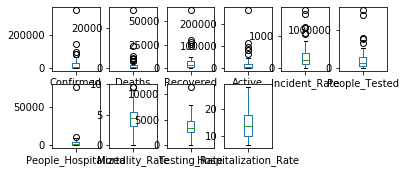

In [29]:
df.plot(kind='box',subplots=True,layout=(3,6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text xticklabel objects>)

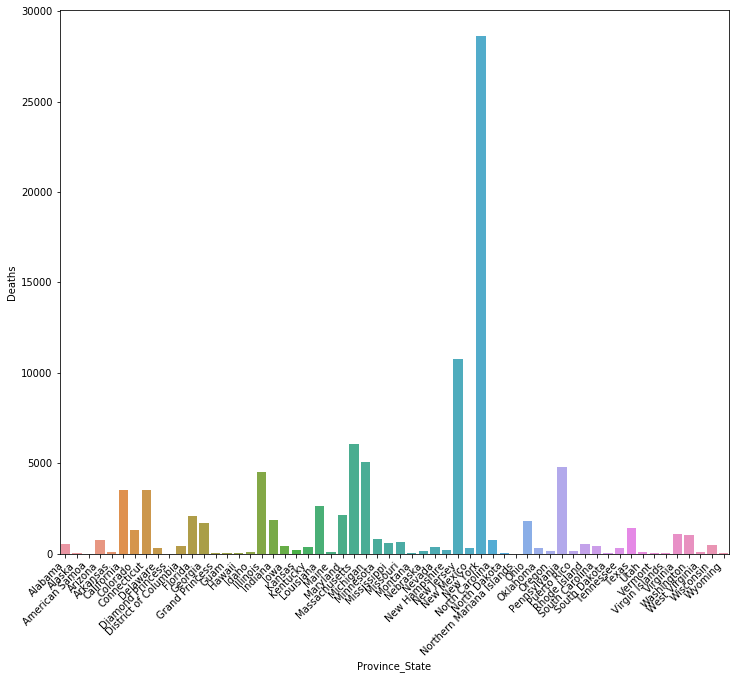

In [30]:
f,ax=plt.subplots(figsize=(12,10))
sns.barplot(x="Province_State",y="Deaths",data=df,ax=ax)
plt.xticks(rotation=45,ha="right")


By visualizing above graph we can say that as 21.05.20  New York was worst affected by the virus as it has highest nos. of 
deaths among all other states from US
 




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text xticklabel objects>)

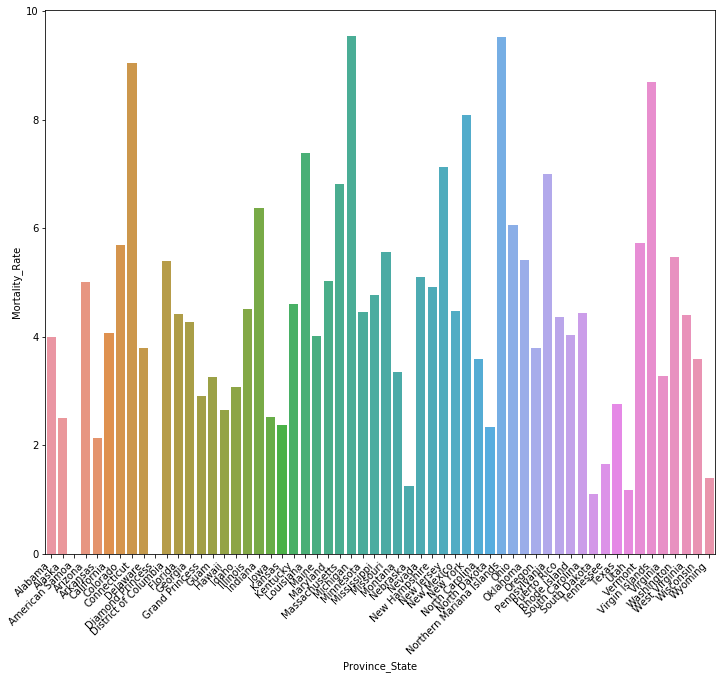

In [31]:
f,ax=plt.subplots(figsize=(12,10))
sns.barplot(x="Province_State",y="Mortality_Rate",data=df,ax=ax)
plt.xticks(rotation=45,ha="right")


In [32]:
# checking sum of null values in each column of our dataset
df.isnull().sum()                

Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [33]:
df.dtypes

Province_State           object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

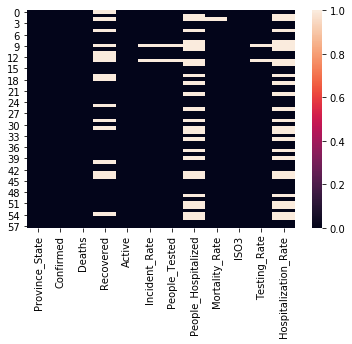

In [34]:
sns.heatmap(df.isnull())

In [35]:
# imputing the missing values of numerical data type with the mean value
from sklearn.impute import SimpleImputer

imp= SimpleImputer(strategy="mean")

for column in df.columns:
    if df[column].dtype == "float64":
        df[column]=imp.fit_transform(df[column].values.reshape(-1,1))

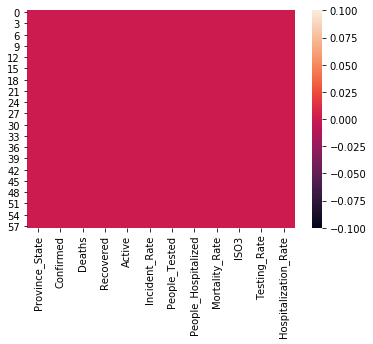

In [36]:
sns.heatmap(df.isnull())

In [37]:
# dropping out irrelevant columns here
df.drop(columns=["Province_State","ISO3"],inplace=True)

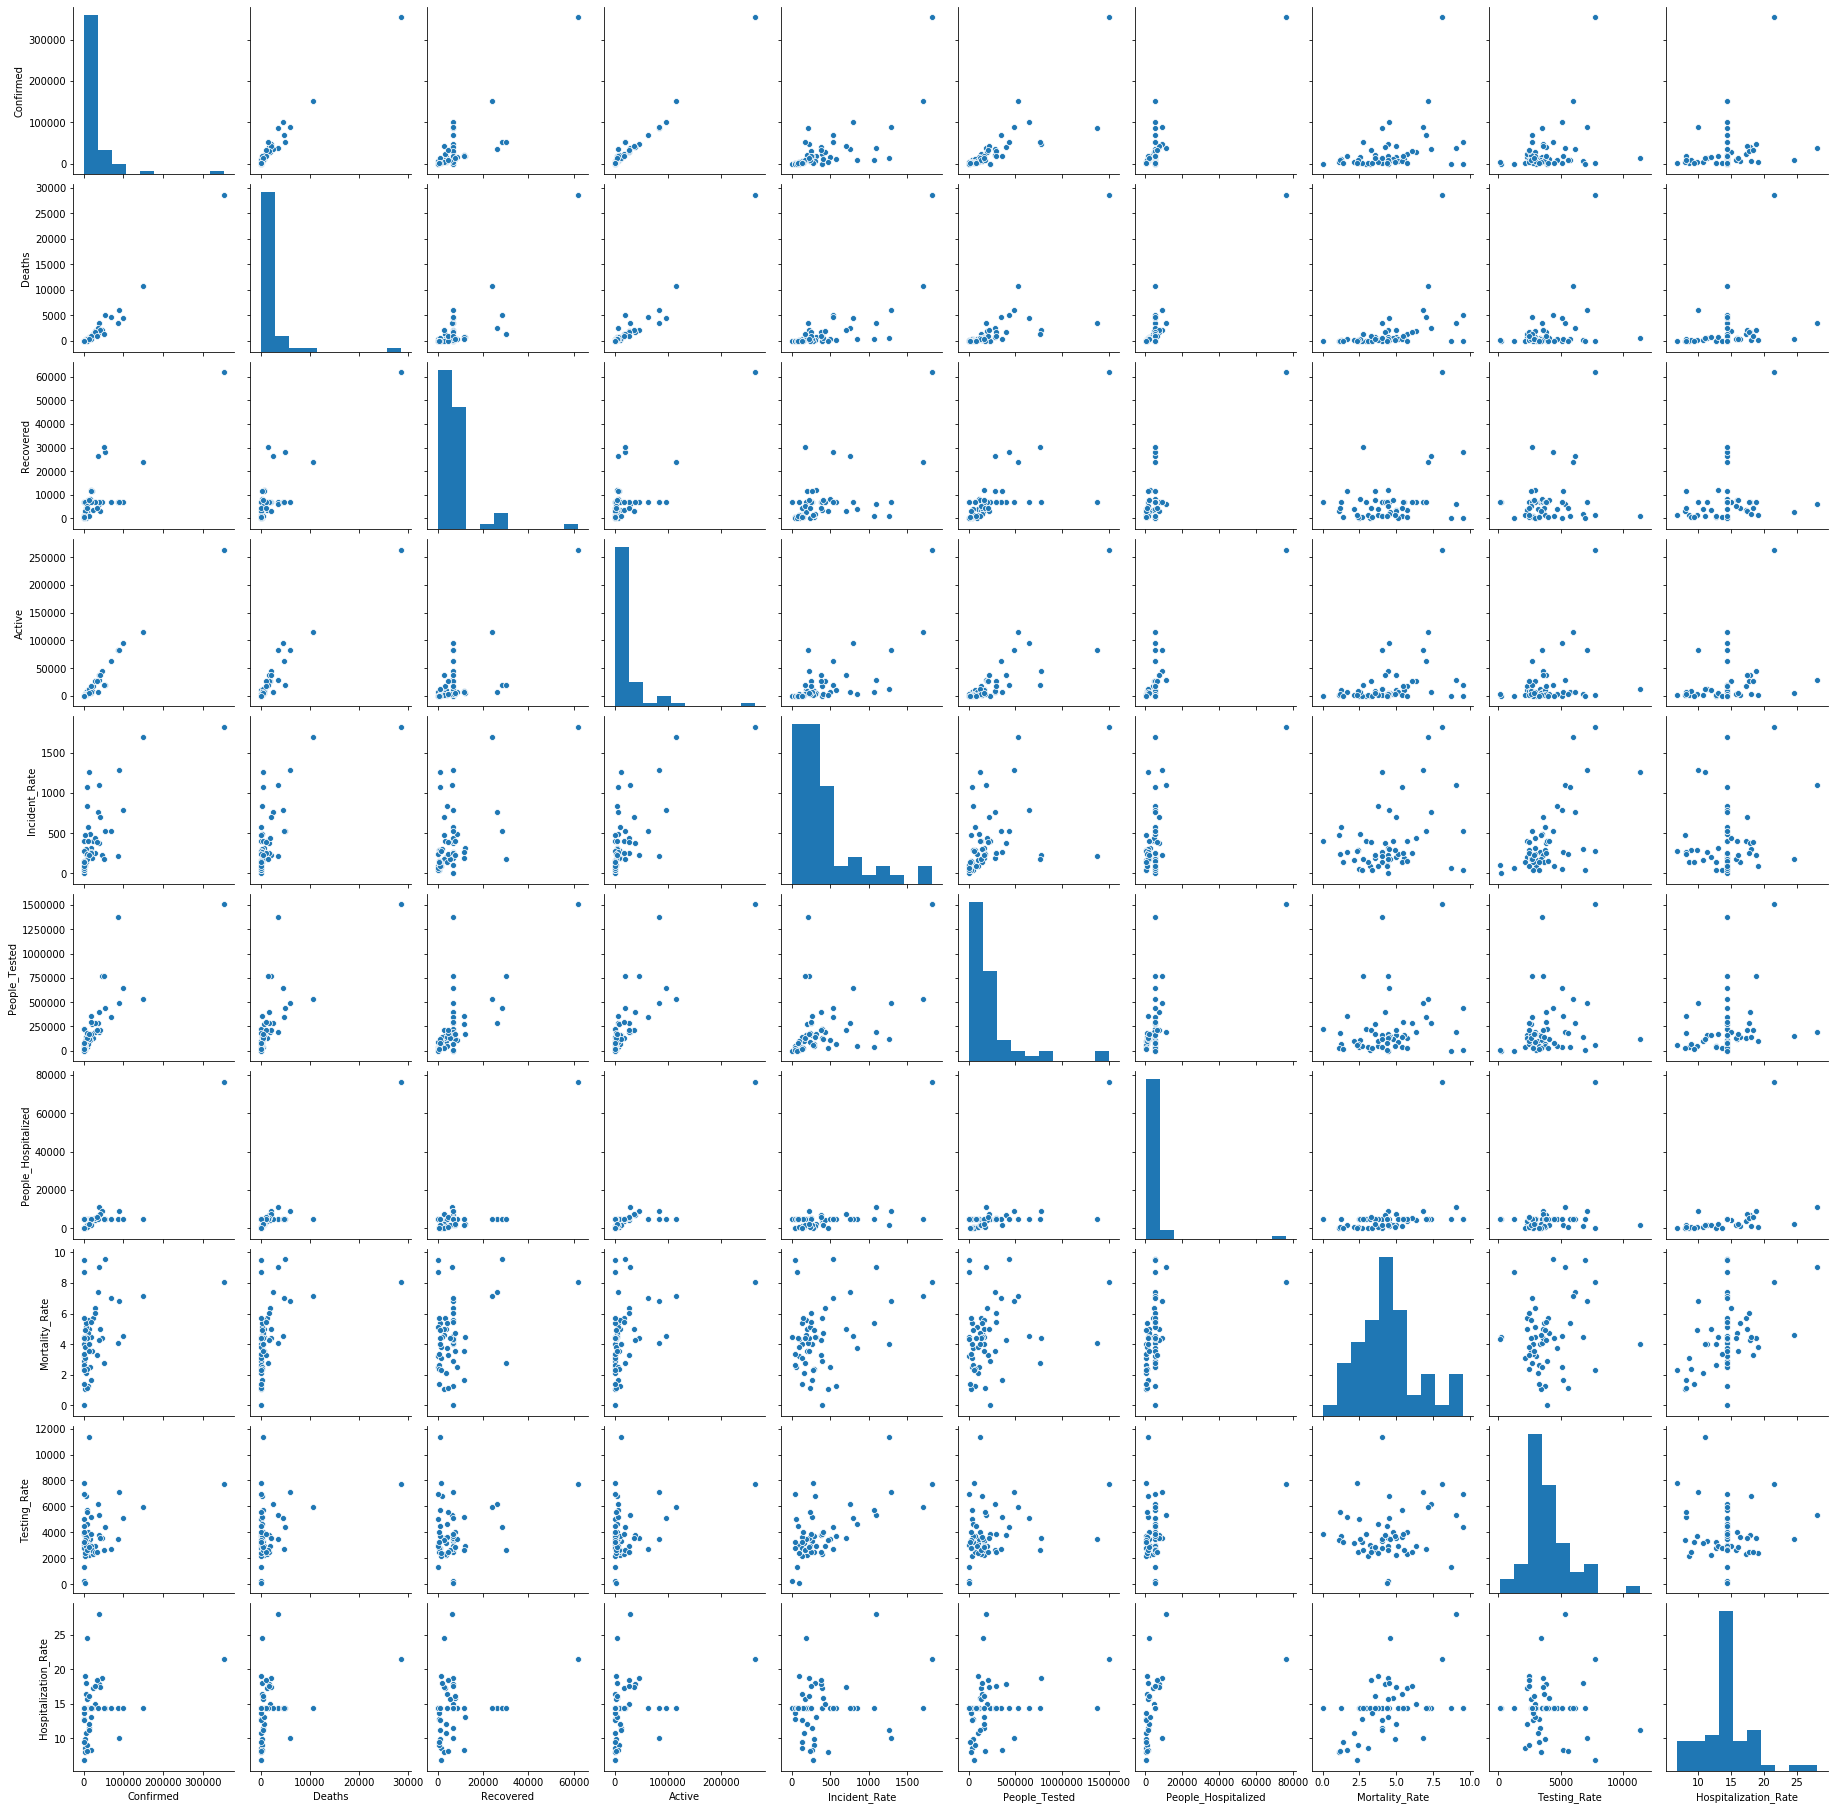

In [38]:
# pair plotting
sns.pairplot(df)

In [39]:
# By using zscore removing outliers here
from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(58, 10)
(53, 10)


In [40]:
#Splitting the dependent and independent variables here
x=df_new.drop("Deaths",axis=1)
y=df_new["Deaths"]

In [41]:
#scaling the input variables
scale =StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=48,test_size=0.20)

In [43]:
# defining a common function here for all Regression model and there by finding the best random state having highest r2 score
regr  = LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)
    return final_r_state

In [44]:
# Using LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.1712187638992796
r2 score corresponding to 43 is 0.6341967406133171
r2 score corresponding to 44 is 0.9044175100842902
r2 score corresponding to 45 is 0.27173379797527697
r2 score corresponding to 46 is 0.5442863306157886
r2 score corresponding to 47 is 0.8319335969364932
r2 score corresponding to 48 is 0.08654167800000578
r2 score corresponding to 49 is 0.8812563651949374
r2 score corresponding to 50 is 0.7972132685059251
r2 score corresponding to 51 is 0.7779789166458936
r2 score corresponding to 52 is 0.761750623050376
r2 score corresponding to 53 is -6.328973801731278
r2 score corresponding to 54 is 0.8344640677066989
r2 score corresponding to 55 is 0.8471394892271464
r2 score corresponding to 56 is 0.41567986731880413
r2 score corresponding to 57 is 0.24283335014057605
r2 score corresponding to 58 is 0.12675302913205488
r2 score corresponding to 59 is 0.5113494922117916
r2 score corresponding to 60 is 0.80165670367032
r2 score corresponding to 61 

In [45]:
## Using GridSearchCV to find out the best parameters of the KNeighborsRegressor model
neighbors = {"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 3}

In [46]:
# Using the best parameter obtained above finding out the best random sate of KNeighborsRegressor having highest r2 score
knr=KNeighborsRegressor(n_neighbors=3)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.7453960380845222
r2 score corresponding to 43 is 0.8869173785273784
r2 score corresponding to 44 is 0.559192850503718
r2 score corresponding to 45 is 0.8457270768621196
r2 score corresponding to 46 is 0.9001484936535463
r2 score corresponding to 47 is 0.5146637790433166
r2 score corresponding to 48 is 0.5592478343971322
r2 score corresponding to 49 is 0.9058744363556291
r2 score corresponding to 50 is 0.5165514710982877
r2 score corresponding to 51 is 0.977937026393272
r2 score corresponding to 52 is 0.5214544301241547
r2 score corresponding to 53 is 0.15981109697914242
r2 score corresponding to 54 is 0.5898067637449234
r2 score corresponding to 55 is 0.9397683165274651
r2 score corresponding to 56 is 0.6931853676913834
r2 score corresponding to 57 is 0.8064342240601365
r2 score corresponding to 58 is 0.427586546540511
r2 score corresponding to 59 is 0.8124854140197924
r2 score corresponding to 60 is 0.5576726403495482
r2 score corresponding to 61 is 0

In [47]:
# Lets chaeck the mean r2 score of both Linear regression model and knn  regression
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

#Based on below output KNN Regression is performing well

Mean r2 score for Linear Regression:  0.46281260359630494
standard deviation in r2 score for Linear Regression:  0.561618054056836

Mean r2 score for KNN Regression:  0.6649961398678965
standard deviation in r2 score for KNN Regression:  0.26935820668026045


In [48]:
## Using GridSearchCV to find out the best parameters of the Support vector regressor model
from sklearn.svm import SVR
parameters={"kernel":["linear","rbf","poly"],"C":[1,10]}
svr = SVR()
clf=GridSearchCV(svr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [49]:
# Using the best parameter obtained above finding out the best random sate of Support vector regressor model
# having highest r2 score
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x,y)

r2 score corresponding to 42 is 0.6521858504789471
r2 score corresponding to 43 is 0.7533872385269897
r2 score corresponding to 44 is 0.5785630749236176
r2 score corresponding to 45 is 0.8178899005078771
r2 score corresponding to 46 is 0.8225806894150167
r2 score corresponding to 47 is 0.4861341797573179
r2 score corresponding to 48 is 0.8543210764184141
r2 score corresponding to 49 is 0.6158089738132102
r2 score corresponding to 50 is 0.5962679171261538
r2 score corresponding to 51 is 0.7733245699433546
r2 score corresponding to 52 is 0.45929747873719806
r2 score corresponding to 53 is 0.004030060804212088
r2 score corresponding to 54 is 0.5692430832477022
r2 score corresponding to 55 is 0.635173495374852
r2 score corresponding to 56 is 0.6765667622526701
r2 score corresponding to 57 is 0.5709673957855324
r2 score corresponding to 58 is 0.8174501987627302
r2 score corresponding to 59 is 0.7006195035627321
r2 score corresponding to 60 is 0.5092176837518789
r2 score corresponding to 61 

In [50]:
#Lets check Lasso regression and find best value of alpha
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [51]:
#Lets check max r2 score when we use Lasso
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.1853955561211349
r2 score corresponding to 43 is 0.6404160138240713
r2 score corresponding to 44 is 0.905547249097132
r2 score corresponding to 45 is 0.3055573460303491
r2 score corresponding to 46 is 0.5641569177251
r2 score corresponding to 47 is 0.8307520359347014
r2 score corresponding to 48 is 0.14995253345790205
r2 score corresponding to 49 is 0.8863407287188072
r2 score corresponding to 50 is 0.8053934450620216
r2 score corresponding to 51 is 0.7835547864029939
r2 score corresponding to 52 is 0.7606834798820716
r2 score corresponding to 53 is -6.362257194217591
r2 score corresponding to 54 is 0.8383415267291157
r2 score corresponding to 55 is 0.8489102026959028
r2 score corresponding to 56 is 0.4440540158752774
r2 score corresponding to 57 is 0.28142243551210533
r2 score corresponding to 58 is 0.1690118626600704
r2 score corresponding to 59 is 0.5149643065432054
r2 score corresponding to 60 is 0.8002896262552723
r2 score corresponding to 61 is 0

In [52]:
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.4777354531527598
standard deviation in r2 score for Lasso Regression:  0.5423488122070468


In [53]:
#Lets check Ridge regression and find best value of alpha
rdreg =Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [54]:
#Lets check max r2 score when we use Ridge with best paramtere value =1 obtained using GridSearchCV
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.1826940274418447
r2 score corresponding to 43 is 0.6545047666278352
r2 score corresponding to 44 is 0.9019296421742885
r2 score corresponding to 45 is 0.5475438242123436
r2 score corresponding to 46 is 0.782347988498747
r2 score corresponding to 47 is 0.8218548619426056
r2 score corresponding to 48 is 0.33399394432975305
r2 score corresponding to 49 is 0.8963341930793706
r2 score corresponding to 50 is 0.8043862007651468
r2 score corresponding to 51 is 0.8169109575241995
r2 score corresponding to 52 is 0.7457608999022962
r2 score corresponding to 53 is -6.585681936972482
r2 score corresponding to 54 is 0.8418964064480351
r2 score corresponding to 55 is 0.8806563146308851
r2 score corresponding to 56 is 0.5277226885078983
r2 score corresponding to 57 is 0.5638616784305335
r2 score corresponding to 58 is 0.3272630206681699
r2 score corresponding to 59 is 0.5318232097071003
r2 score corresponding to 60 is 0.7911172712224982
r2 score corresponding to 61 is

In [55]:
# to check whether our result gets boosted or not
from sklearn.ensemble import RandomForestRegressor

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=75,test_size=0.20)
rf=RandomForestRegressor(n_estimators=200,random_state=75)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [57]:
rfscore=rf.score(x_train,y_train)
print(rfscore*100)

97.59963218811951


In [58]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is: 993.5027748554377
r2_score is: 0.5343242914140669


KNeighborsRegressor outperformed LinearRegression model,SVR model,Lasso,Ridge with a max r2 score of 97.79 and 
standard deviation in r2 score 0.269 only

In [59]:
from sklearn.externals import joblib

In [60]:
#Save the model as a pickle in a file
joblib.dump(knr,"knrcovid.pkl")

['knrcovid.pkl']

In [61]:
model=joblib.load("knrcovid.pkl")

In [62]:
model.predict(x_test)

array([ 255.        ,  684.66666667, 1648.        , 3177.33333333,
        106.66666667,  150.33333333,  486.        , 2000.        ,
         65.33333333,  128.66666667,  178.        ])

In [63]:
print(y_test)

2        0
29     640
6     1299
26    5060
4      107
14       5
41     299
11    2096
23      73
20     202
31     138
Name: Deaths, dtype: int64
